# Задача анти-фрода в банковском секторе

Цель: Необходимо научиться определять мошеннические транзакции

## Датасет

Данные симулированные. У нас будет 1000 клиентов, и их транзакции вместе с мошенническими за 2 года - с 1 января 2019 по 31 декабря 2020.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!gdown --id 1nfep3GAPgyQ59IEYVQxm9xx5RMfy68tf -O fraud_train.csv
!gdown --id 1k0pAjvvvGgVeplUq1iA4QWlANr5i8Pyo -O fraud_test.csv

In [3]:
data_train = pd.read_csv('fraud_train.csv')
data_test = pd.read_csv('fraud_test.csv')

In [4]:
data_train.shape

(1296675, 23)

In [5]:
data_test.shape

(555719, 23)

In [6]:
data_train.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
print(data_train.isnull().sum())
print('-----')
print(data_test.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
-----
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat      

In [9]:
print(data_train['is_fraud'].unique())
print(data_test['is_fraud'].unique())

[0 1]
[0 1]


In [10]:
fraud_counts_train = data_train['is_fraud'].value_counts(normalize=True) * 100
fraud_counts_test = data_test['is_fraud'].value_counts(normalize=True) * 100
print(fraud_counts_train)
print(fraud_counts_test)

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64
is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64


In [11]:
def show_fraud_rate_for_categories(df, categorical_cols):
    sns.set_theme(style='whitegrid')
    plt.figure(figsize=(16, 4 * len(categorical_cols)))

    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(len(categorical_cols), 1, i)
        temp = df.groupby(col)['is_fraud'].mean().sort_values(ascending=False)
        sns.barplot(x=temp.index, y=temp.values, hue=temp.index, palette='viridis', legend=False)
        plt.ylabel('Fraud Rate (%)')
        plt.title(f'Fraud Rate by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

    plt.suptitle("Fraud Rate by Categorical Features", fontsize=18, y=1.02)
    plt.show()

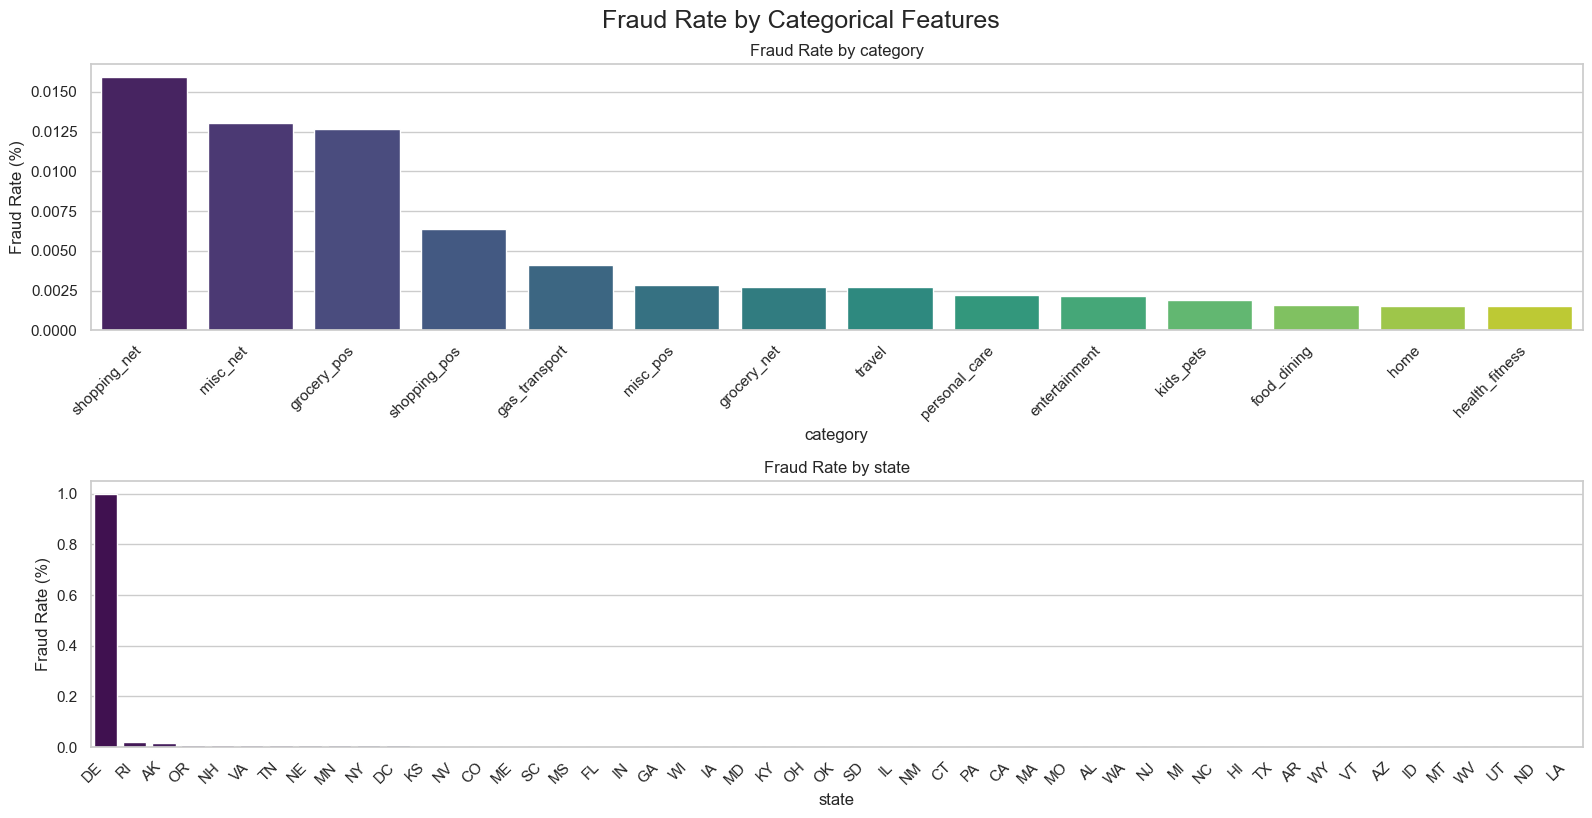

In [12]:
data = pd.concat([data_train, data_test], axis=0)
categorial_cols = ['category', 'state']
show_fraud_rate_for_categories(data, categorial_cols)

In [13]:
print(len(data[data['state'] == 'DE']))
print(len(data[data['state'] == 'RI']))
print(len(data_train[data_train['state'] == 'DE']))
print(len(data_test[data_test['state'] == 'DE']))

9
745
9
0


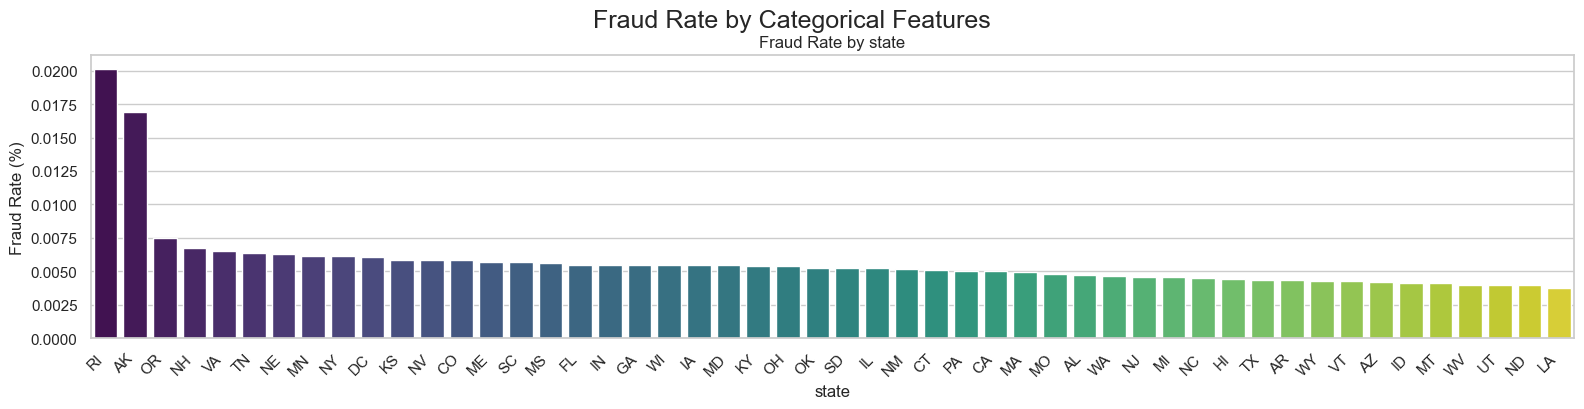

In [14]:
clear_data = data[data['state'] != 'DE']
show_fraud_rate_for_categories(clear_data, ['state'])

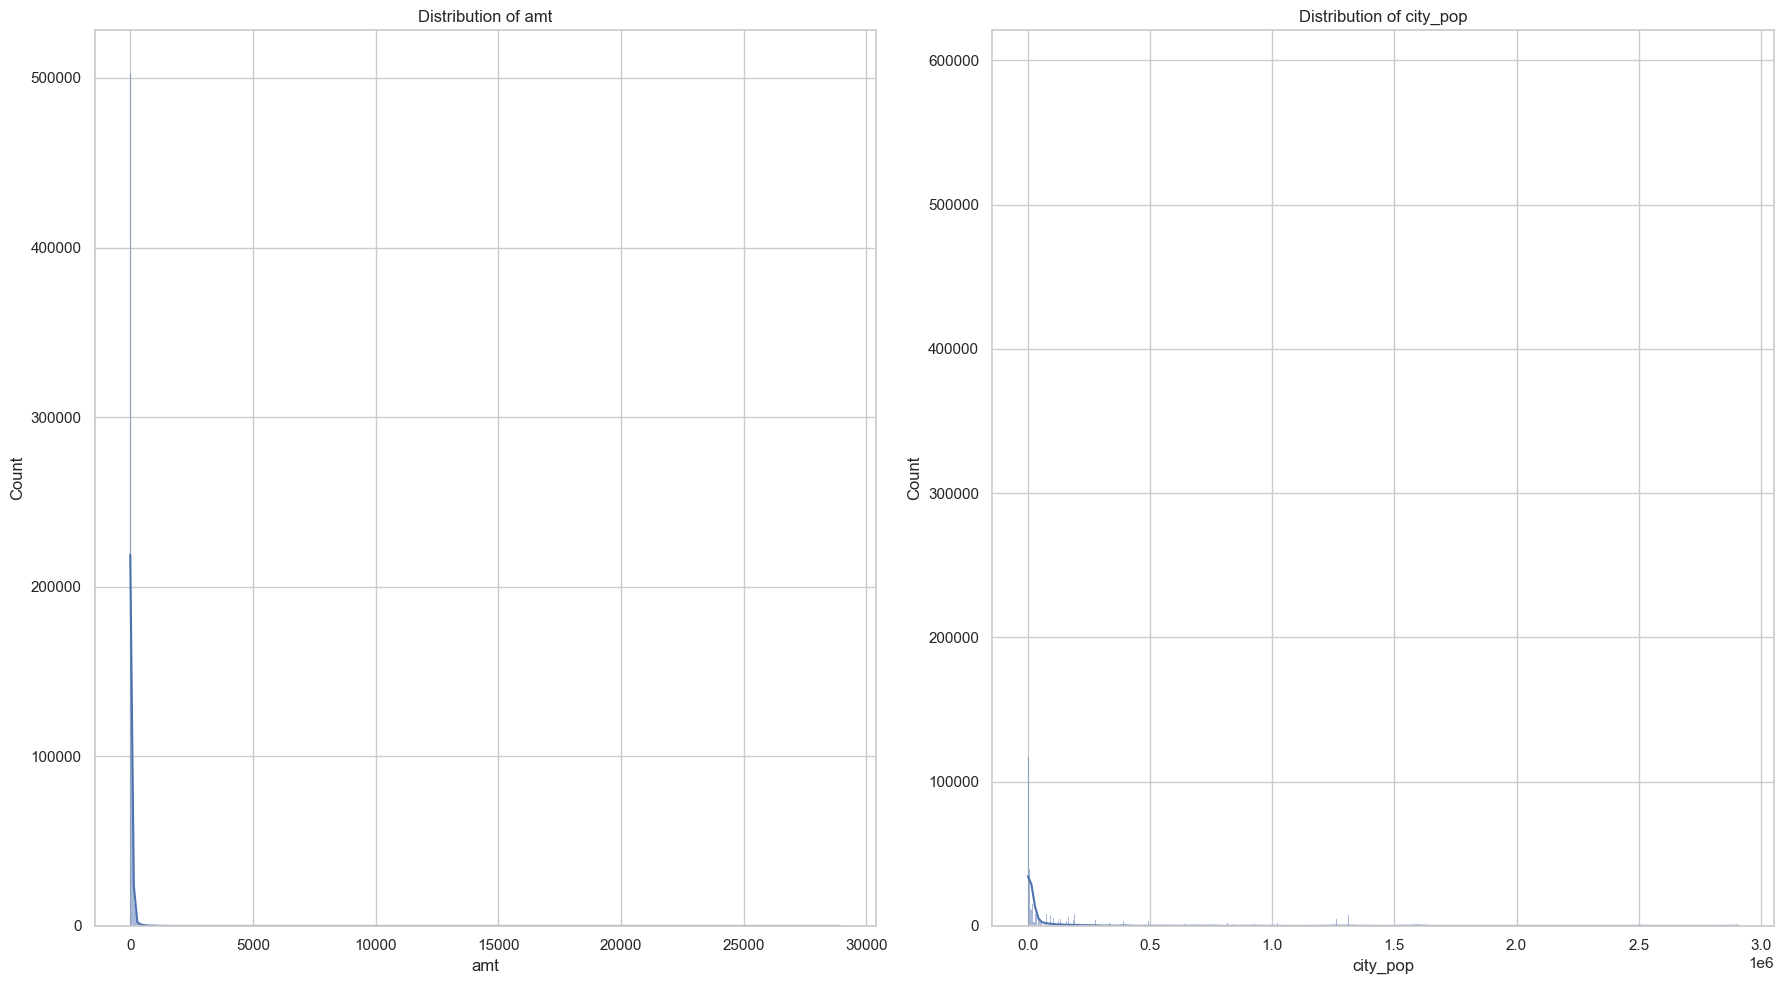

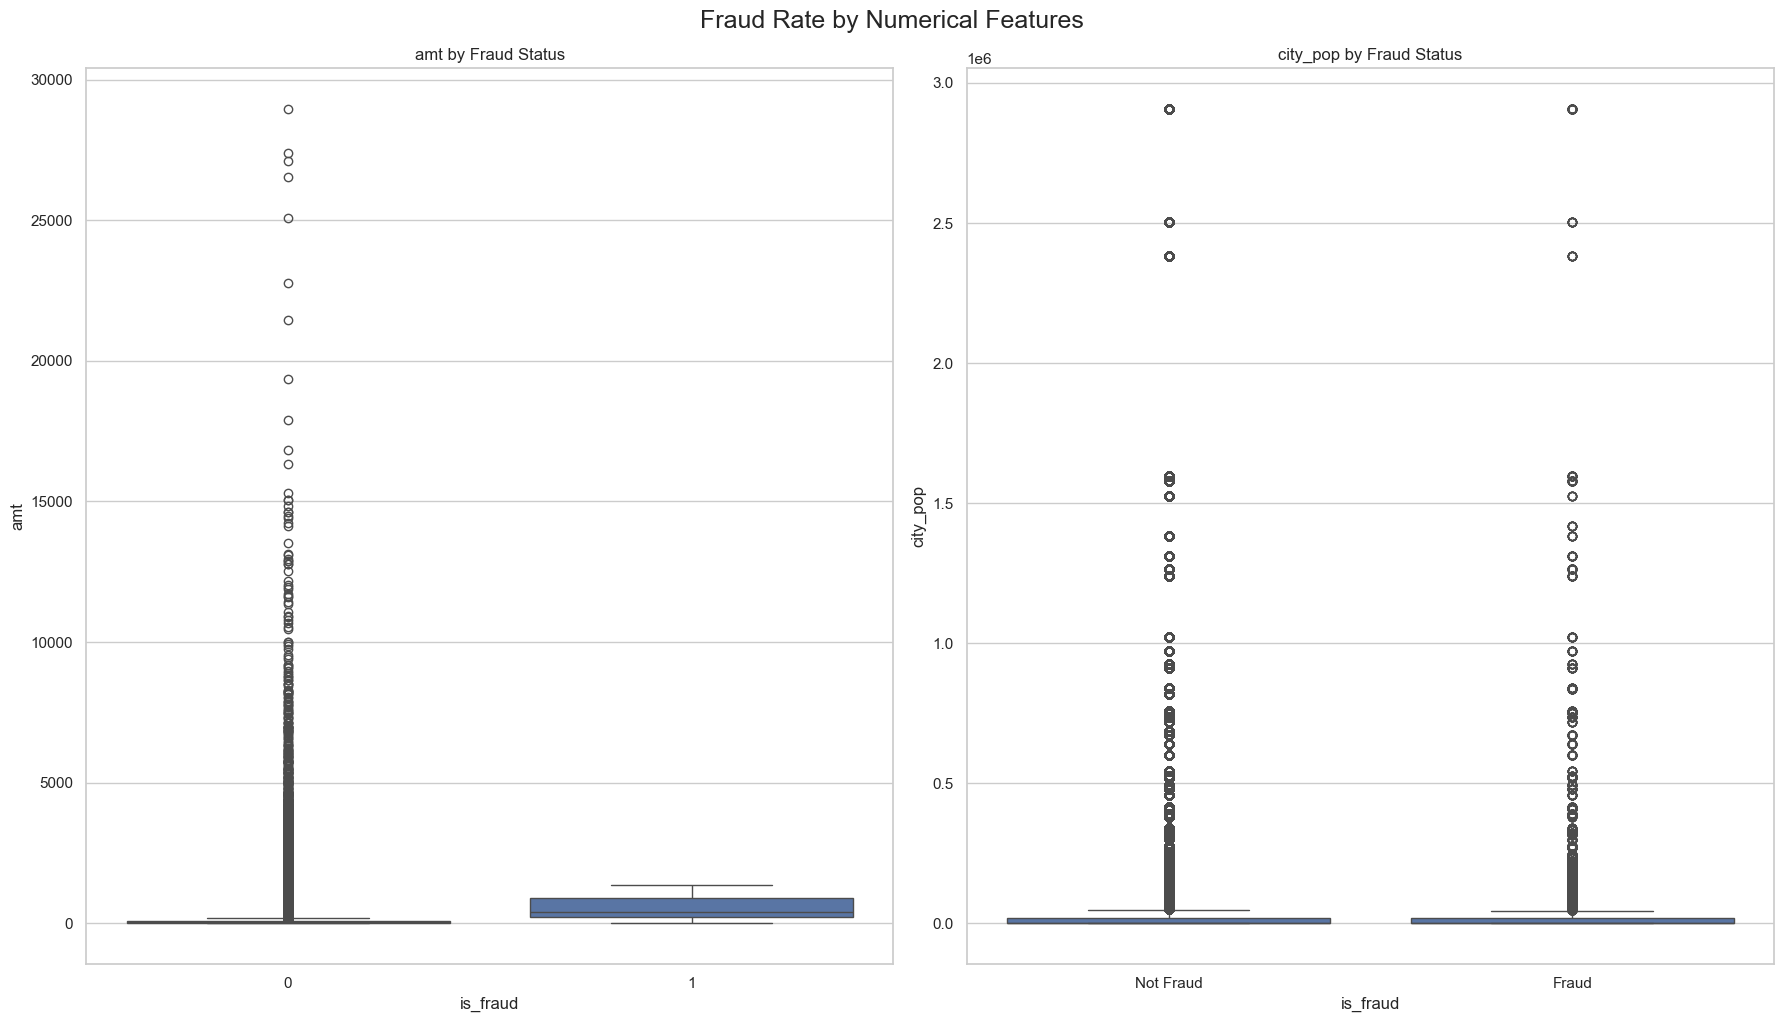

In [15]:
numerical_cols = ['amt', 'city_pop']

plt.figure(figsize=(18, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='is_fraud', y=col, data=data)
    plt.title(f'{col} by Fraud Status')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.tight_layout()
plt.suptitle("Fraud Rate by Numerical Features", fontsize=18, y=1.02)
plt.show()

In [16]:
percentile_75_fraud = data[data['is_fraud'] == 1]['amt'].quantile(0.75)
percentile_75_not_fraud = data[data['is_fraud'] == 0]['amt'].quantile(0.75)
print(f'{percentile_75_fraud:.2f}')
print(f'{percentile_75_not_fraud:.2f}')

902.37
82.56


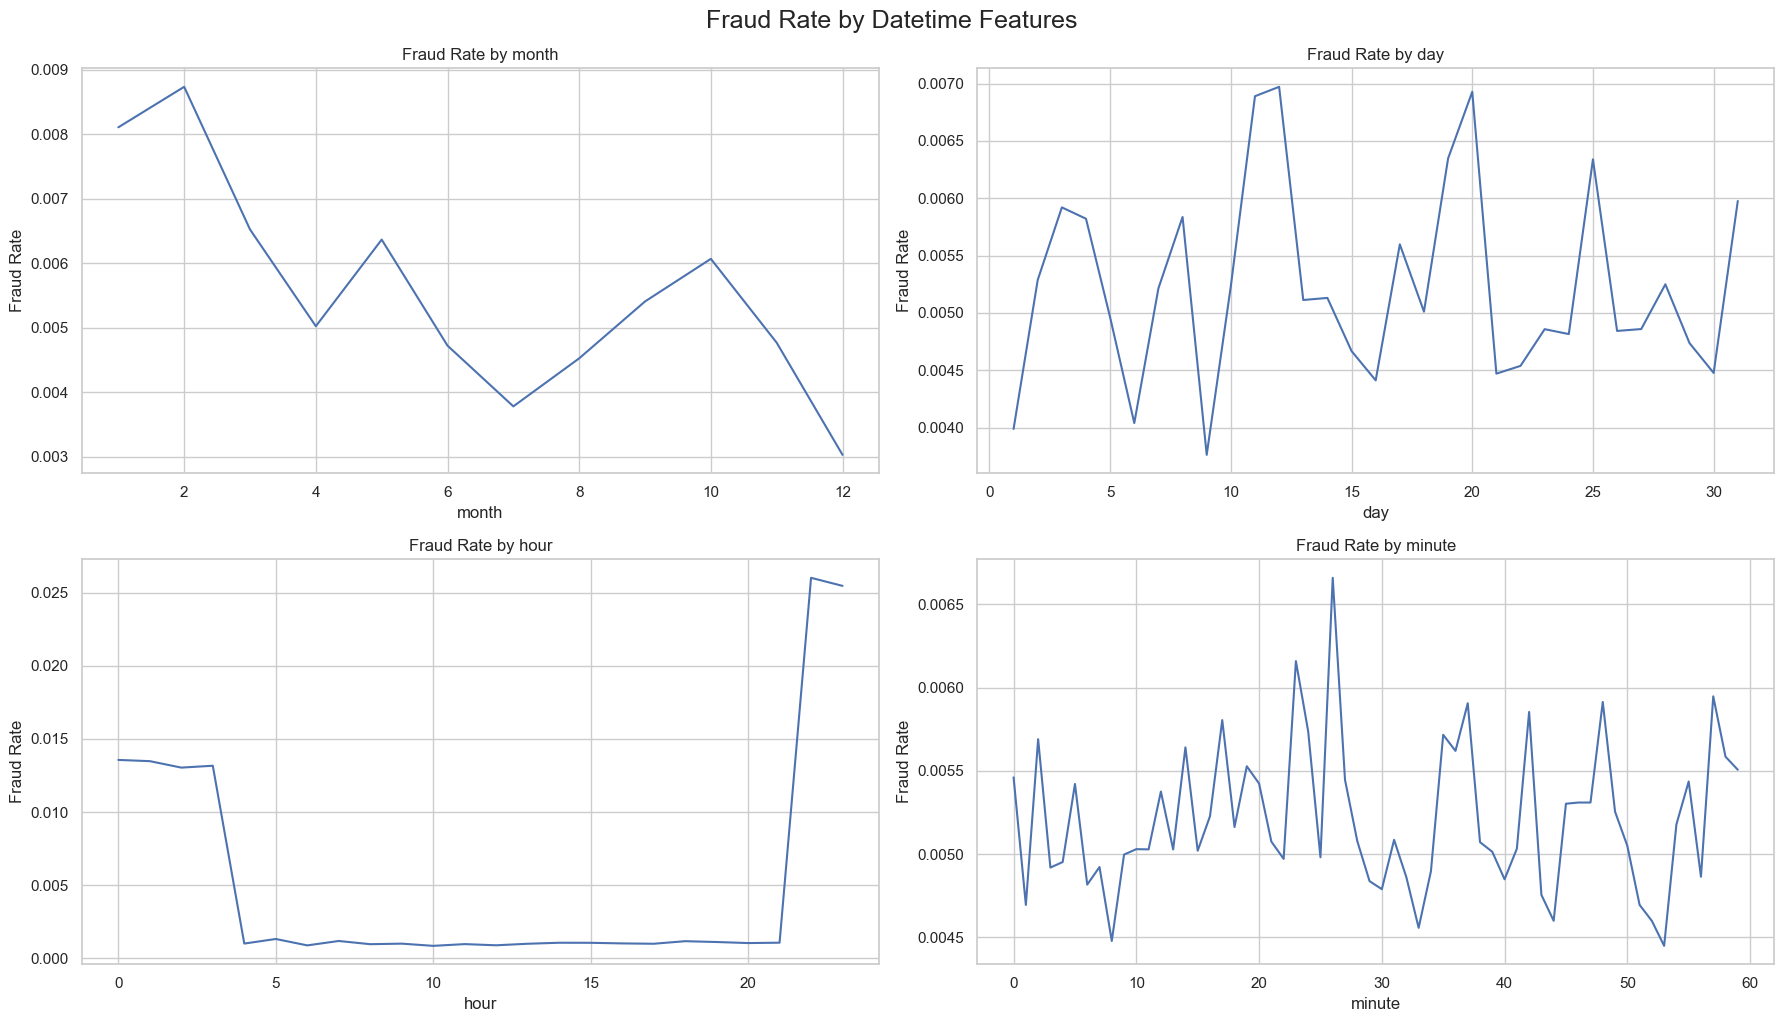

In [17]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['year'] = data['trans_date_trans_time'].dt.year
data['month'] = data['trans_date_trans_time'].dt.month
data['day'] = data['trans_date_trans_time'].dt.day
data['hour'] = data['trans_date_trans_time'].dt.hour
data['minute'] = data['trans_date_trans_time'].dt.minute

time_features = ['month', 'day', 'hour', 'minute']

plt.figure(figsize=(18, 10))

for i, feature in enumerate(time_features):
    plt.subplot(2, 2, i + 1)
    fraud_rate_by_time = data.groupby(feature)['is_fraud'].mean()
    sns.lineplot(x=fraud_rate_by_time.index, y=fraud_rate_by_time.values)
    plt.title(f'Fraud Rate by {feature}')
    plt.ylabel('Fraud Rate')
    plt.xlabel(feature)
plt.tight_layout()
plt.suptitle("Fraud Rate by Datetime Features", fontsize=18, y=1.02)
plt.show()

In [18]:
def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371
    lat1_rad, lon1_rad, lat2_rad, lon2_rad = map(np.radians, [lat1, lon1, lat2, lon2])

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = r * c
    return distance


data['distance'] = data.apply(
    lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

display(data.head(1))

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,distance
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1325376018,36.011293,-82.048315,0,2019,1,1,0,0,78.597568


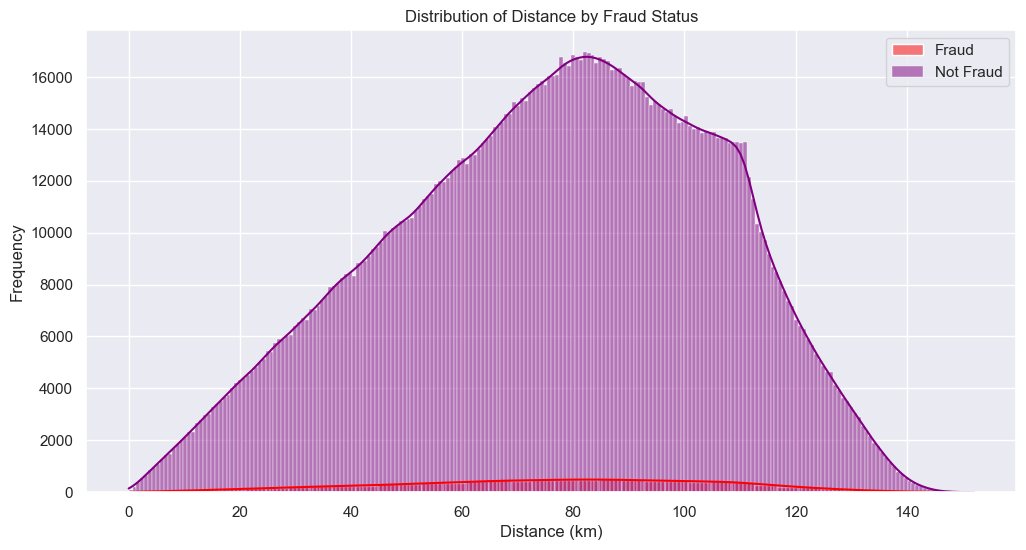

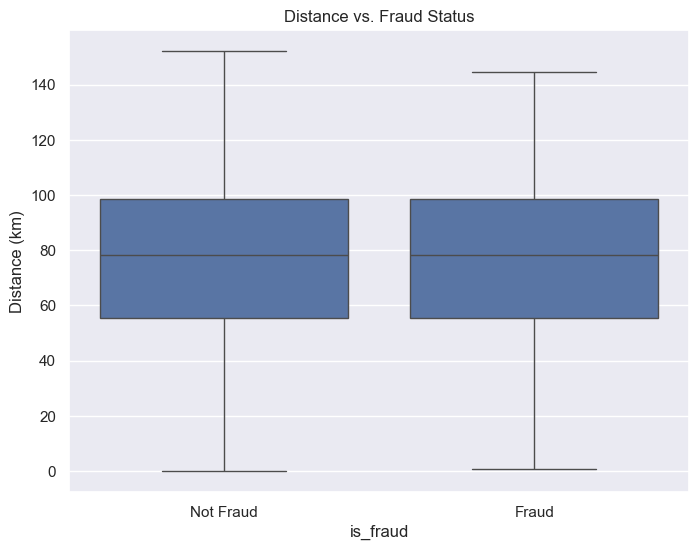

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['is_fraud'] == 1]['distance'], kde=True, color='red', label='Fraud')
sns.histplot(data[data['is_fraud'] == 0]['distance'], kde=True, color='purple', label='Not Fraud')
plt.title('Distribution of Distance by Fraud Status')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='distance', data=data)
plt.title('Distance vs. Fraud Status')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.ylabel('Distance (km)')
plt.show()

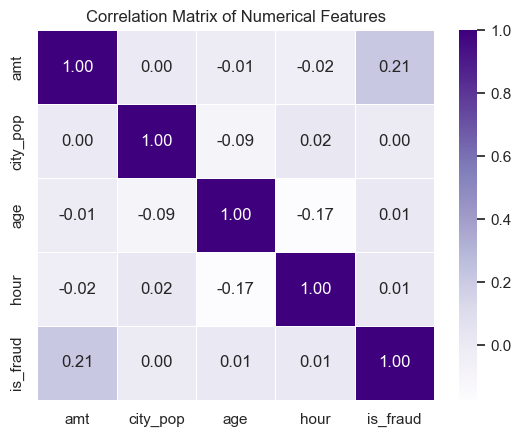

In [20]:
data['age'] = pd.to_datetime(data['trans_date_trans_time']).dt.year - pd.to_datetime(data['dob']).dt.year

numerical_features = ['amt', 'city_pop', 'age', 'hour', 'is_fraud']
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc

def evaluate_model(y_true, y_proba):
    y_pred = (y_proba > 0.5).astype(int)

    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:')
    print(cm)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)

    print(f"\nPrecision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(recall_curve, precision_curve)

    plt.figure(figsize=(8, 6))
    plt.plot(recall_curve, precision_curve, label=f'PR Curve (AUC = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

In [23]:
def prepare_df(df):
    processed_data = df.copy()
    processed_data.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'unix_time', 'trans_num', 'street', 'city'], inplace=True)

    processed_data['trans_date_trans_time'] = pd.to_datetime(processed_data['trans_date_trans_time'])
    processed_data['hour'] = processed_data['trans_date_trans_time'].dt.hour
    processed_data.drop(columns=['trans_date_trans_time'], inplace=True)

    return processed_data

In [24]:
def heuristic_predict(df, amt_threshold, hour_range):
    predictions = np.zeros(len(df), dtype=int)
    high_amount_fraud = df['amt'] > amt_threshold
    if hour_range[0] < hour_range[1]:
        unusual_hour_fraud = (df['hour'] >= hour_range[0]) & (df['hour'] <= hour_range[1])
    else:
        unusual_hour_fraud = (df['hour'] >= hour_range[0]) | (df['hour'] <= hour_range[1])

    predictions[(high_amount_fraud | unusual_hour_fraud)] = 1

    return predictions

Confusion Matrix:
[[286656 266918]
 [    71   2074]]

Precision: 0.0077
Recall: 0.9669
F1-score: 0.0153
ROC AUC: 0.7424


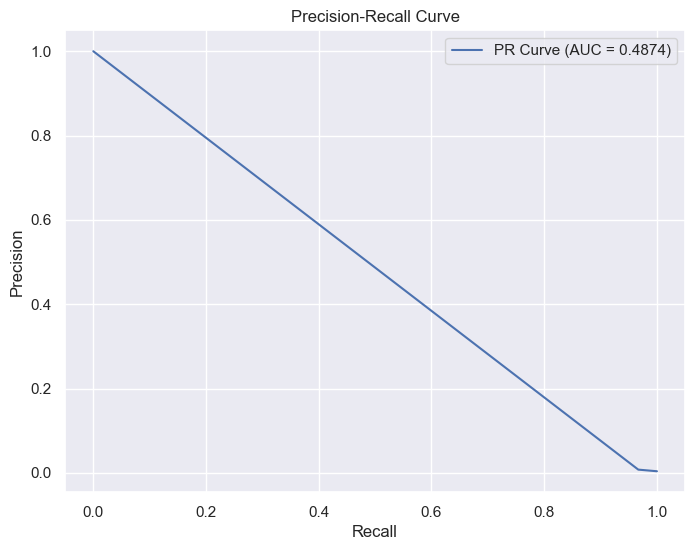

In [27]:
amt_threshold = 82.5
hour_range = (21, 4)

y_proba_heuristic = heuristic_predict(prepare_df(data_test), amt_threshold, hour_range)
y_proba_heuristic_for_eval = y_proba_heuristic.astype(float)
y_true_test = data_test['is_fraud'].values
evaluate_model(y_true_test, y_proba_heuristic_for_eval)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [29]:
def prepare_df_for_ml_model(df, numerical_cols, categorial_cols, scaler_for_num=None):
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['day'] = df['trans_date_trans_time'].dt.day
    df['month'] = df['trans_date_trans_time'].dt.month
    df['year'] = df['trans_date_trans_time'].dt.year
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['minute'] = df['trans_date_trans_time'].dt.minute
    df.drop(columns=['trans_date_trans_time'], inplace=True)

    df['dob'] = pd.to_datetime(df['dob'])
    df['year_dob'] = df['dob'].dt.year
    df.drop(columns=['dob'], inplace=True)

    df['age'] = df['year'] - df['year_dob']
    df.drop(columns=['year_dob'], inplace=True)

    bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
    labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    le = LabelEncoder()
    for col in categorial_cols:
        df[col] = le.fit_transform(df[col])

    if scaler_for_num is None:
        scaler = StandardScaler()
        scaler_for_num = scaler
        df[numerical_cols] = scaler_for_num.fit_transform(df[numerical_cols])
    else:
        df[numerical_cols] = scaler_for_num.transform(df[numerical_cols])

    return df, scaler_for_num

In [30]:
train_copy = data_train.copy()
test_copy = data_test.copy()

In [36]:
columns_to_drop = [
  'Unnamed: 0',
  'cc_num',
  'first',
  'last',
  'unix_time',
  'trans_num',
  'street',
  'city',
  'state',
  'gender',
  'zip'
]

train_copy.drop(columns=columns_to_drop, inplace=True)
test_copy.drop(columns=columns_to_drop, inplace=True)
train_copy.head(1)

,trans_date_trans_time,category,amt,city_pop,dob,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,3495,1988-03-09,0


In [37]:
y_train = train_copy['is_fraud']
X_train = train_copy.drop(columns=['is_fraud'])
y_test = test_copy['is_fraud']
X_test = test_copy.drop(columns=['is_fraud'])

In [ ]:
categorical_cols = ['category', 'age_group']
numerical_cols = ['amt', 'city_pop', 'day', 'month', 'year', 'hour', 'minute', 'age']

processed_X_train, scaler = prepare_df_for_ml_model(X_train, numerical_cols, categorical_cols)
processed_X_test, scaler = prepare_df_for_ml_model(X_test, numerical_cols, categorical_cols, scaler)

In [45]:
print("Preprocessing complete.")
print(f"Shape of X_train: {processed_X_train.shape}")
print(f"Shape of X_test: {processed_X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")

Preprocessing complete.
Shape of X_train: (1296675, 10)
Shape of X_test: (555719, 10)
Shape of y_train: (1296675,)


In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model.fit(processed_X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [47]:
y_proba_lr = model.predict_proba(processed_X_test)[:, 1]

Confusion Matrix:
[[537906  15668]
 [   572   1573]]

Precision: 0.0912
Recall: 0.7333
F1-score: 0.1623
ROC AUC: 0.8501


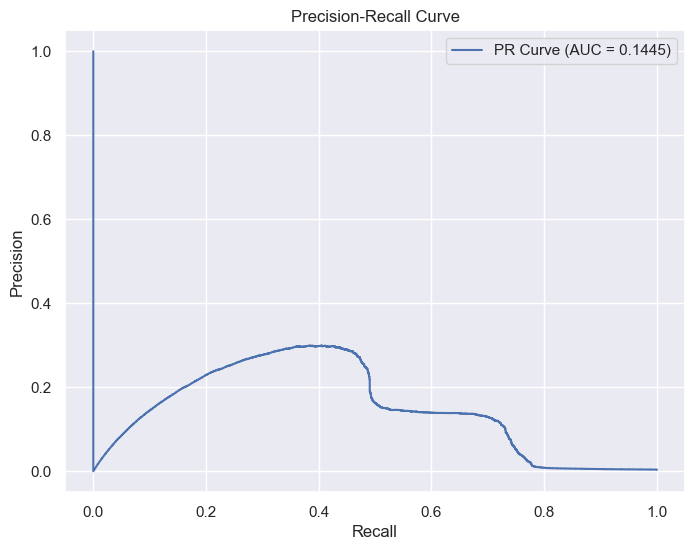

In [52]:
evaluate_model(y_test, y_proba_lr)

In [53]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    random_seed=42,
    verbose=False,
    auto_class_weights='Balanced',
    eval_metric='F1'
)

model.fit(processed_X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

Confusion Matrix:
[[550982   2592]
 [   209   1936]]

Precision: 0.4276
Recall: 0.9026
F1-score: 0.5802
ROC AUC: 0.9962


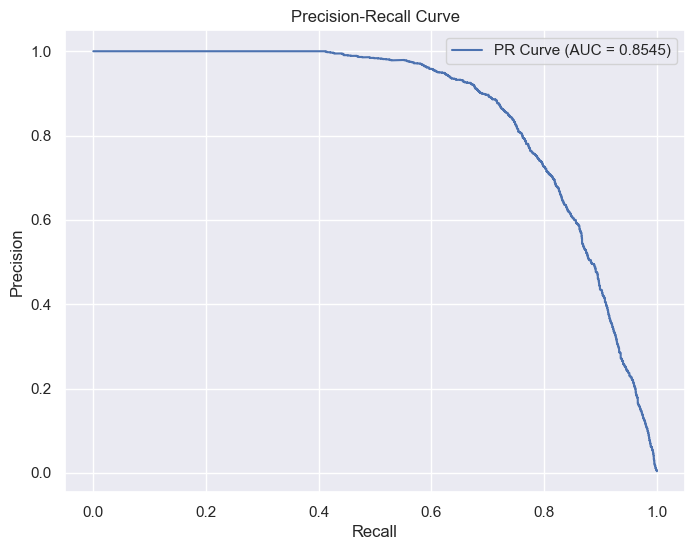

In [54]:
evaluate_model(y_test, y_pred_proba)